2022-11-12 21:01:01.019666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 21:01:01.193036: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-12 21:01:01.833839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib:/home/sheldon/miniconda3/envs/tf/lib/
2022-11-12 21:01:01.833917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerr

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


2022-11-12 21:01:03.374224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 21:01:03.374542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 21:01:03.374798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 21:01:03.374989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/20


2022-11-12 21:01:04.990327: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-12 21:01:05.255857: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 21:01:05.256490: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 21:01:05.256517: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-12 21:01:05.257251: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-12 21:01:05.257376: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


50/50 [==============================] - 7s 107ms/step - loss: 2.9085 - accuracy: 0.4980 - val_loss: 1.3753 - val_accuracy: 0.5160
Epoch 2/20
50/50 [==============================] - 5s 105ms/step - loss: 0.8489 - accuracy: 0.5410 - val_loss: 0.7242 - val_accuracy: 0.6160
Epoch 3/20
50/50 [==============================] - 5s 105ms/step - loss: 0.7221 - accuracy: 0.5720 - val_loss: 0.6675 - val_accuracy: 0.6320
Epoch 4/20
50/50 [==============================] - 5s 104ms/step - loss: 0.7015 - accuracy: 0.5650 - val_loss: 0.6614 - val_accuracy: 0.6440
Epoch 5/20
50/50 [==============================] - 5s 105ms/step - loss: 0.6655 - accuracy: 0.5940 - val_loss: 0.6341 - val_accuracy: 0.6520
Epoch 6/20
50/50 [==============================] - 5s 105ms/step - loss: 0.6754 - accuracy: 0.5610 - val_loss: 0.6146 - val_accuracy: 0.6400
Epoch 7/20
50/50 [==============================] - 5s 104ms/step - loss: 0.6749 - accuracy: 0.5860 - val_loss: 0.6153 - val_accuracy: 0.6280
Epoch 8/20
50/50 

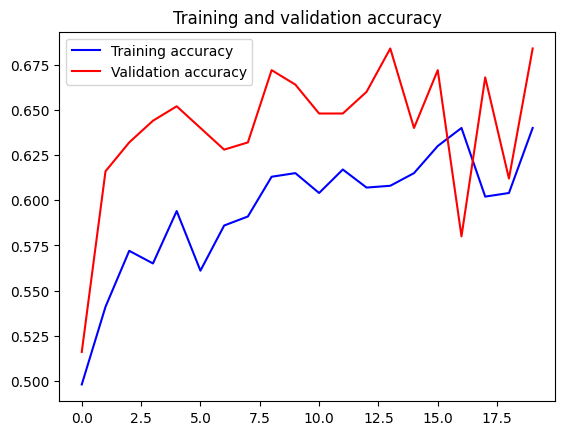

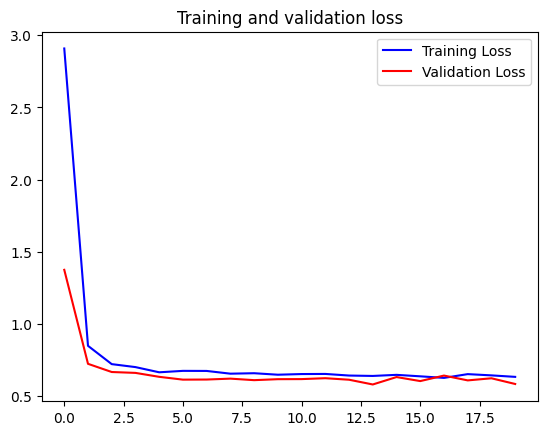

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd

import os
import random
import shutil
import pathlib

from keras_preprocessing.image import ImageDataGenerator

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)


def create_folder_structure():
    shutil.rmtree('./train', ignore_errors=True)
    pathlib.Path("./train/train/dogs").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/train/cats").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/validate/dogs").mkdir(parents=True, exist_ok=True)
    pathlib.Path("./train/validate/cats").mkdir(parents=True, exist_ok=True)


def copy_images(source_list, destination_path):
    for image in source_list:
        shutil.copyfile(f'./input_data/{image}', f'./train/{destination_path}/{image}')


def create_training_and_validation_set(train_validation_split, sample_cnt):
    cat_and_dog_images = os.listdir('./input_data')

    cat_images = list(filter(lambda image: 'cat' in image, cat_and_dog_images))
    cat_images = random.sample(cat_images, sample_cnt)
    dog_images = list(filter(lambda image: 'dog' in image, cat_and_dog_images))
    dog_images = random.sample(dog_images, sample_cnt)

    random.shuffle(cat_images)
    random.shuffle(dog_images)

    split_index = int(len(cat_images) * train_validation_split)

    training_cats = cat_images[:split_index]
    validation_cats = cat_images[split_index:]
    training_dogs = dog_images[:split_index]
    validation_dogs = dog_images[split_index:]

    create_folder_structure()
    copy_images(training_dogs, 'train/dogs')
    copy_images(training_cats, 'train/cats')
    copy_images(validation_dogs, 'validate/dogs')
    copy_images(validation_cats, 'validate/cats')


def train_model():
    train_gen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_iterator = train_gen.flow_from_directory('./train/train',
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

    validation_gen = ImageDataGenerator(rescale=1. / 255.0)
    validation_iterator = validation_gen.flow_from_directory('./train/validate',
                                                             target_size=(150, 150),
                                                             batch_size=10,
                                                             class_mode='binary')

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
        keras.layers.MaxPool2D((2, 2)),
        #keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
        #keras.layers.MaxPool2D((2, 2)),
        #keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        #keras.layers.MaxPool2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=512, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

    history = model.fit(train_iterator,
                        validation_data=validation_iterator,
                        steps_per_epoch=50,
                        epochs=20,
                        validation_steps=25)

    model.save('dogs-vs-cats.h5')

    return history


def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

create_training_and_validation_set(0.8, 1000)
result_history = train_model()
plot_result(result_history)